# Covid-19 Wastewater Analysis

Project by: Christee Kee, Judy Luu, and Felicia Villanueva

# Report Summary

SARS-CoV-2 has been a major public health crises for almost three years. With unpredictable surges in reported cases, public officials have resorted to establishing national predictive wastewater analysis to monitor SARS-CoV-2 levels present in wastewater treatment plants. 

As people use water for their daily needs (toilets, showers, sinks, etc), the SARS-CoV-2 virus sheds with the water used and is then draint to water treatmet plants. From there, wastewater samples are collected by CDC officials to test for virus levels present within the sample. 

This data is valuable because it is anonymous and does not rely on individual reporting. It does not require a person to know they have the virus. Many people do not confirm their cases with a government reported test because they do not realize they have Covid19, or they take a rapid home test and do not use reporting tools on government websites, so their cases are not offically counted. This makes public health measures difficult for stakeholders to navigate. Wastewater data is valuable because health officials can use this data to make decisions and request funding as well as plan for surges in cases so that they can ready medical facilities for impending increases. 

The data collected is limited to watersheds managed by public officials, therefore locations, such as rural areas, that collect wastewater via septic tanks are not included in the dataset. Additionally, cities started their wastewater testing and collection at different times, so increases and decreases of Covid-19 levels are measured relative to the same treatment facility's previous sample collection. This in turn means some facilities did not collect during January 2022 when record breaking surges in cases occurred nationally.
1. **Import Python Libraries/Statements**
2. **Reading Covid-19 Wasterwater Dataset**
3. **Analyzing the Original Dataset** 
    - Variable descriptions
    - Basic information of dataset
    
4. **Cleaning the Original Dataset** 
    - Changing datatype for columns 
    - Removing outliers
    - Removing impossible data values
    - Converting column date datatype
    
5. **Questions, Interpretations, Key Findings, and Visualizations** 
6. **Key Findings** 
7. **Conclusion** 


## 1. Importing Python Libraries/Statements

In [967]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
import datetime
from matplotlib import rcParams

## 2. Reading Covid-19 Wastewater Dataset 

Our data is available on the Centers for Disease Control and Prevention (CDC) website here https://data.cdc.gov/Public-Health-Surveillance/NWSS-Public-SARS-CoV-2-Wastewater-Metric-Data/2ew6-ywp6 

In [968]:
df = pd.read_csv("NWSS_Public_SARS-CoV-2_Wastewater_Metric_Data (3).csv", lineterminator='\n', on_bad_lines="warn", low_memory=False)

In [969]:
df.head(n=100)

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
0,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-11,2022-09-25,NaN,100.0,100.0,no,2022-09-25
1,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-12,2022-09-26,NaN,100.0,100.0,no,2022-09-25
2,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-13,2022-09-27,-98.0,100.0,91.5,no,2022-09-25
3,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-14,2022-09-28,-98.0,100.0,91.5,no,2022-09-25
4,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-15,2022-09-29,-98.0,100.0,91.5,no,2022-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-01,2022-07-15,92.0,100.0,83.6,no,2022-06-01
96,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-02,2022-07-16,92.0,100.0,83.6,no,2022-06-01
97,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-03,2022-07-17,92.0,100.0,83.6,no,2022-06-01
98,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-04,2022-07-18,8.0,100.0,77.2,no,2022-06-01


## 3. Analyzing the Original Dataset

### Variable descriptions: 
- **wwtp_jurisdiction**: US State the wastewater treatment plant in 'wwtp_id' is located	
- **wwtp_id**: Wastewater treatment plants
- **reporting_jurisdiction**: The CDC ELC jurisdiction, a state, reporting the data
- **sample_location**: Sample collection location in the wastewater system
- **sample_location_specify**: "Upstream" sample locations	
- **key_plot_id**: geographic area served by sampling sites (sewersheds)
- **county_names**: County and county-equivalent names corresponding to the FIPS codes	
- **county_fips**: 5-digit numberic FIP codes all counties and county-equivalents served by the sampling site	
- **population_served**: Estimated number of persons served by the sampling site	
- **date_start**: The start date of the interval over which metric is calculated
- **date_end**: The end date of the interval over which metric is calculated
- **ptc_15d**: The percent change in SARS-CoV-2 RNA levels over the 15-day interval defined by 'date_start' and 'date_end'
- **detect_prop_15d**: The proportion of tests with SARS-CoV-2 detected, meaning a cycle threshold (Ct) value <40 for RT-qPCR or at least 3 positive droplets/partitions for RT-ddPCR, by sewershed over the 15-day window defined by 'date_start' and "date_end'
- **percentile**: This metric shows whether SARS-CoV-2 virus levels at a site are currently higher or lower than past historical levels at the same site. 
- **sampling_prior**: Indicates whether the site was collecting wastewater samples before or on December 1, 2021.
- **first_sample_date**: The first date samples were collected at a site.
 


### Basic information of dataset

In [970]:
print("The shape of the data is :",df.shape)


The shape of the data is : (361669, 16)


## 4. Cleaning the Original Dataset

### Changing datatype for columns 

Changed data type of columns wwtp_id and sample_location_specify from float64 to object. 

In [971]:
change_datatype_wwtp_id = {'wwtp_id': str}
df = df.astype(change_datatype_wwtp_id)

change_datatype_sample_location_specify = {'sample_location_specify' : str}
df = df.astype(change_datatype_sample_location_specify) 


In [972]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361669 entries, 0 to 361668
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wwtp_jurisdiction        361669 non-null  object 
 1   wwtp_id                  361669 non-null  object 
 2   reporting_jurisdiction   361669 non-null  object 
 3   sample_location          361669 non-null  object 
 4   sample_location_specify  361669 non-null  object 
 5   key_plot_id              361669 non-null  object 
 6   county_names             361669 non-null  object 
 7   county_fips              361669 non-null  object 
 8   population_served        361669 non-null  int64  
 9   date_start               361669 non-null  object 
 10  date_end                 361669 non-null  object 
 11  ptc_15d                  324727 non-null  float64
 12  detect_prop_15d          344881 non-null  float64
 13  percentile               263534 non-null  float64
 14  samp

In [973]:
df.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,3.616690e+05,3.247270e+05,344881.000000,263534.000000
mean,1.200851e+05,3.491184e+06,92.062419,68.950996
std,2.996939e+05,8.230352e+07,21.954981,134.156220
min,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,1.120000e+04,-5.700000e+01,100.000000,32.000000
50%,3.071400e+04,0.000000e+00,100.000000,51.667000
75%,9.285000e+04,1.290000e+02,100.000000,70.000000
max,4.000000e+06,2.147484e+09,100.000000,999.000000


### Removing outliers 

Percentile Column has a max of 999.00, which should not be possible. We will check how many values in that column are over 100, which should be the maximum percentile logically. 

In [974]:
percentile_outliers = df[df.percentile > 100]
percentile_outliers.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,5208.000000,1.484000e+03,2431.000000,5208.0
mean,57320.741935,4.064048e+07,92.370218,999.0
std,87840.618859,2.922678e+08,23.757856,0.0
min,3000.000000,-1.000000e+02,0.000000,999.0
25%,6108.000000,-7.200000e+01,100.000000,999.0
50%,25000.000000,-6.000000e+00,100.000000,999.0
75%,55000.000000,2.520000e+02,100.000000,999.0
max,564563.000000,2.147484e+09,100.000000,999.0


### Removing impossible data values

We need to drop the percentile column outliers so that they do not skew the data. 

In [975]:
df.drop(df[df['percentile'] > 100].index, inplace = True)
print("We can now see that the percentile max is 100, which means the outliers were removed")
df.describe()

We can now see that the percentile max is 100, which means the outliers were removed


,population_served,ptc_15d,detect_prop_15d,percentile
count,3.564610e+05,3.232430e+05,342450.000000,258326.000000
mean,1.210021e+05,3.320633e+06,92.060234,50.200675
std,3.015917e+05,8.004189e+07,21.941675,23.882641
min,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,1.130000e+04,-5.700000e+01,100.000000,31.667000
50%,3.071400e+04,0.000000e+00,100.000000,51.000000
75%,9.285000e+04,1.280000e+02,100.000000,69.000000
max,4.000000e+06,2.147484e+09,100.000000,100.000000


### Converting column date datatype

Convert columns with dates from string object to date data type, which will let us sort and filter by date:

In [976]:
df['date_start'] = pd.to_datetime(df['date_start'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['first_sample_date'] = pd.to_datetime(df['first_sample_date'])

Make sure that dates are no longer strings:

In [977]:
df.info()
# We can see they now have the Dtype 'datetime64'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 356461 entries, 0 to 361668
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wwtp_jurisdiction        356461 non-null  object        
 1   wwtp_id                  356461 non-null  object        
 2   reporting_jurisdiction   356461 non-null  object        
 3   sample_location          356461 non-null  object        
 4   sample_location_specify  356461 non-null  object        
 5   key_plot_id              356461 non-null  object        
 6   county_names             356461 non-null  object        
 7   county_fips              356461 non-null  object        
 8   population_served        356461 non-null  int64         
 9   date_start               356461 non-null  datetime64[ns]
 10  date_end                 356461 non-null  datetime64[ns]
 11  ptc_15d                  323243 non-null  float64       
 12  detect_prop_15d 

______________________________________________________________________________________________________________

### Covid-19 Spike
Covid-19 cases reached a historical high, or "spike", January 16, 2022 (New York Times, 2022). Many wastewater testing sides were not collecting yet at that time. We will now filter out rows that have a "first_sample_date" value that is after January 16, 2022. 

In [978]:
spike = pd.to_datetime('1/16/2022')


In [979]:
recorded_spike = df.loc[df.first_sample_date <= spike, :] #This data frame will only include rows with collection sites that 
#were recording before the spike

did_not_record_spike = df.loc[df.first_sample_date > spike, :] #This data frame will only include rows with collection sites that do not 
#have the spike on record because they started recording afterward.

Now we check to make sure that the filters worked correctly:

In [980]:
recorded_spike.sort_values(by='first_sample_date', ascending = False).head()
#We see here that by sorting by "first_sample_date" and showing the most recent values that they have the value of 1/13/22

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
335769,Ohio,74.0,Ohio,Treatment plant,nan,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-04-03,2022-04-17,167.0,0.0,10.8,no,2022-01-16
108041,Ohio,157.0,Ohio,Treatment plant,nan,NWSS_oh_157_Treatment plant_raw wastewater,Sandusky,39143,25000,2022-07-03,2022-07-17,773.0,100.0,74.5,no,2022-01-16
335871,Ohio,74.0,Ohio,Treatment plant,nan,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-07-14,2022-07-28,-37.0,100.0,75.0,no,2022-01-16
335870,Ohio,74.0,Ohio,Treatment plant,nan,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-07-13,2022-07-27,-37.0,100.0,75.0,no,2022-01-16
335869,Ohio,74.0,Ohio,Treatment plant,nan,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-07-12,2022-07-26,-37.0,100.0,75.0,no,2022-01-16


In [981]:
recorded_spike.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,2.136590e+05,1.943610e+05,205886.000000,124371.000000
mean,1.179479e+05,1.962520e+06,91.873522,50.503940
std,3.048360e+05,6.052247e+07,22.264982,25.246412
min,2.273000e+03,-1.000000e+02,0.000000,0.000000
25%,1.130000e+04,-6.000000e+01,100.000000,30.457000
50%,3.225500e+04,-1.000000e+00,100.000000,51.200000
75%,9.500000e+04,1.430000e+02,100.000000,70.500000
max,4.000000e+06,2.147484e+09,100.000000,100.000000


In [982]:
did_not_record_spike.sort_values(by='first_sample_date').head()
#We see here that by sorting by "first_sample_date" and showing the oldest values that the earliest "first_sample_date"
#in this group is 1/16/22, which was after the spike. This means our filters worked correctly, and our variables hold 
#the correct data. 

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
262466,Wisconsin,313.0,Wisconsin,Treatment plant,nan,NWSS_wi_313_Treatment plant_raw wastewater,Marinette,55075,3500,2022-10-14,2022-10-28,7.0,100.0,73.667,no,2022-01-17
4228,Ohio,315.0,Ohio,Treatment plant,nan,NWSS_oh_315_Treatment plant_raw wastewater,Miami,39109,20581,2022-01-12,2022-01-26,-78.0,100.0,92.000,no,2022-01-17
4229,Ohio,315.0,Ohio,Treatment plant,nan,NWSS_oh_315_Treatment plant_raw wastewater,Miami,39109,20581,2022-01-13,2022-01-27,-78.0,100.0,92.000,no,2022-01-17
4230,Ohio,315.0,Ohio,Treatment plant,nan,NWSS_oh_315_Treatment plant_raw wastewater,Miami,39109,20581,2022-01-14,2022-01-28,-78.0,100.0,92.000,no,2022-01-17
4231,Ohio,315.0,Ohio,Treatment plant,nan,NWSS_oh_315_Treatment plant_raw wastewater,Miami,39109,20581,2022-01-15,2022-01-29,-78.0,100.0,92.000,no,2022-01-17


In [983]:
did_not_record_spike.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,1.428020e+05,1.288820e+05,136564.000000,133955.000000
mean,1.255719e+05,5.368741e+06,92.341723,49.919109
std,2.966138e+05,1.026523e+08,21.442050,22.539145
min,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,1.124600e+04,-5.100000e+01,100.000000,32.500000
50%,3.047900e+04,0.000000e+00,100.000000,50.800000
75%,9.047400e+04,1.090000e+02,100.000000,67.667000
max,4.000000e+06,2.147484e+09,100.000000,100.000000


## 5. Questions, Interpretations, Key Findings, and Visualizations

### Question: What percent of these sites have been collecting samples since before the spike? What percent of these sites have been collecting samples since after the spike?
First we have to find out how many unique testing locations are in each group- those that recorded the spike and those that didnt:

In [984]:
unique_before_spike = len(recorded_spike['wwtp_id'].unique().tolist())
print('Unique testing locations that have been recording since before the spike: ',unique_before_spike)
print()
unique_after_spike = len(did_not_record_spike['wwtp_id'].unique().tolist())
print('Unique testing locations that have not been recording since before the spike: ', unique_after_spike)


Unique testing locations that have been recording since before the spike:  370

Unique testing locations that have not been recording since before the spike:  722


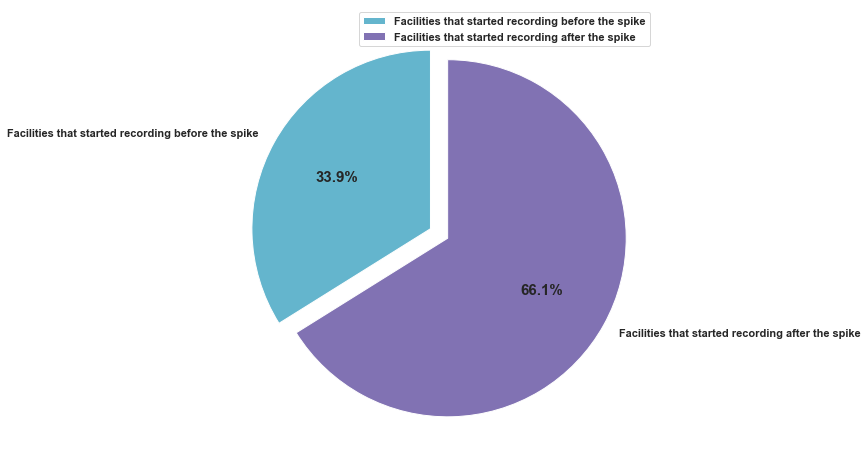

In [985]:
y = np.array([unique_before_spike, unique_after_spike])
mylabels = ["Facilities that started recording before the spike", "Facilities that started recording after the spike"]
myexplode = [.01, 0.1]
mycolors = ["c", "m"]


plt.figure(figsize = (8,10))

plt.rcParams.update({'font.size':15})
plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, startangle = 90, autopct='%1.1f%%')
plt.legend()
plt.show()

A larger percentage, 66.1%, of wastewater treatments plants began testing after the January 16, 2022 spike date, whereas 33.9% of the treatments plants did test during the spike date 

### Question: Were the percentile values for the testing sites affected by not recording during the spike?


**Recent Test Results**

Now we will look at the most recent test results, starting with October 1, 2022.

In [986]:
recent = pd.to_datetime('10/01/2022') #defining "recent" as October 1st, 2022

We will create a data frame for recent tests from the sites that did record the spike:

In [987]:
recent_test_recorded_spike = recorded_spike.loc[recorded_spike.date_start >= recent, :] 

recent_test_recorded_spike.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,1.219900e+04,9.636000e+03,10525.000000,10254.000000
mean,1.393751e+05,3.811702e+06,93.861568,39.145799
std,3.975407e+05,9.012777e+07,18.405948,16.908422
min,2.273000e+03,-1.000000e+02,0.000000,0.000000
25%,1.200000e+04,-4.300000e+01,100.000000,27.200000
50%,3.450000e+04,1.000000e+01,100.000000,37.800000
75%,1.022030e+05,1.450000e+02,100.000000,49.800000
max,4.000000e+06,2.147484e+09,100.000000,95.000000


Now we will create a data frame for recent tests from the sites that did not record the spike:

In [988]:
recent_test_did_not_record_spike = did_not_record_spike.loc[did_not_record_spike.date_start >= recent, :]

recent_test_did_not_record_spike.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,2.408700e+04,2.103400e+04,21720.000000,21573.000000
mean,1.258534e+05,2.454953e+06,95.010129,39.948076
std,2.798118e+05,6.933672e+07,16.243148,19.174858
min,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,1.281800e+04,-4.600000e+01,100.000000,25.000000
50%,3.428600e+04,8.000000e+00,100.000000,38.200000
75%,9.613600e+04,1.270000e+02,100.000000,53.000000
max,4.000000e+06,2.147484e+09,100.000000,100.000000


We created box plots for sites that recorded the spike and did not record the spike to see if percentile values were affected. 

In [989]:
print('Recent percentile mean for sites that did record the spike: ',recent_test_recorded_spike.percentile.mean())
print()
print('We can see that for testing sites that recorded very high values previously show that current levels are still quite \
low in comparison.')

Recent percentile mean for sites that did record the spike:  39.14579910278916

We can see that for testing sites that recorded very high values previously show that current levels are still quite low in comparison.


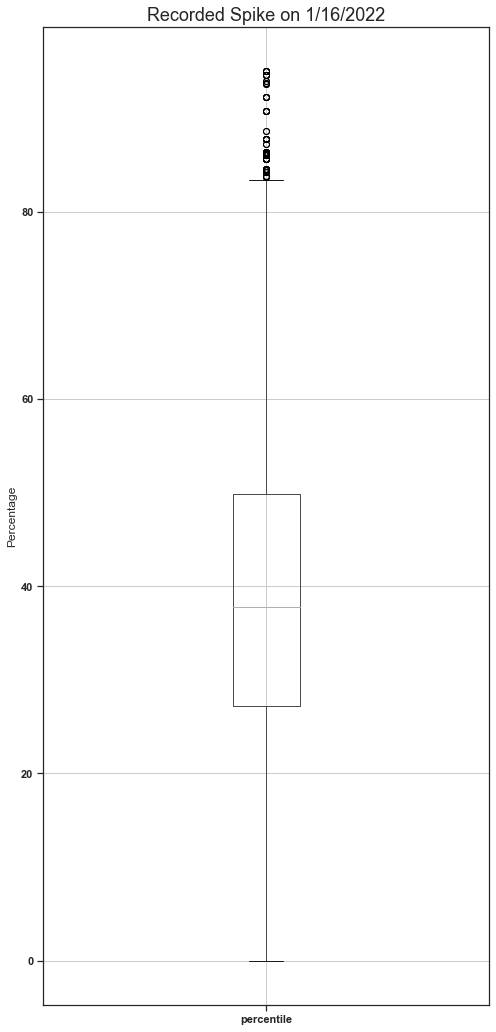

In [990]:
plt.figure(figsize = (8,18))
recent_test_recorded_spike.boxplot('percentile')

font1 = {'size':18}
#fig = plt.figure()
#fig.suptitle('Recorded Spike')
plt.title('Recorded Spike on 1/16/2022', fontdict=font1)
plt.ylabel('Percentage')


plt.show()

In [991]:
print('Recent percentile mean for sites that did not record the spike: ',recent_test_did_not_record_spike.percentile.mean())
print()
print('We can see that for testing sites that did not record very high values previously show that current levels \
are still quite low in comparison.')

Recent percentile mean for sites that did not record the spike:  39.9480762063692

We can see that for testing sites that did not record very high values previously show that current levels are still quite low in comparison.


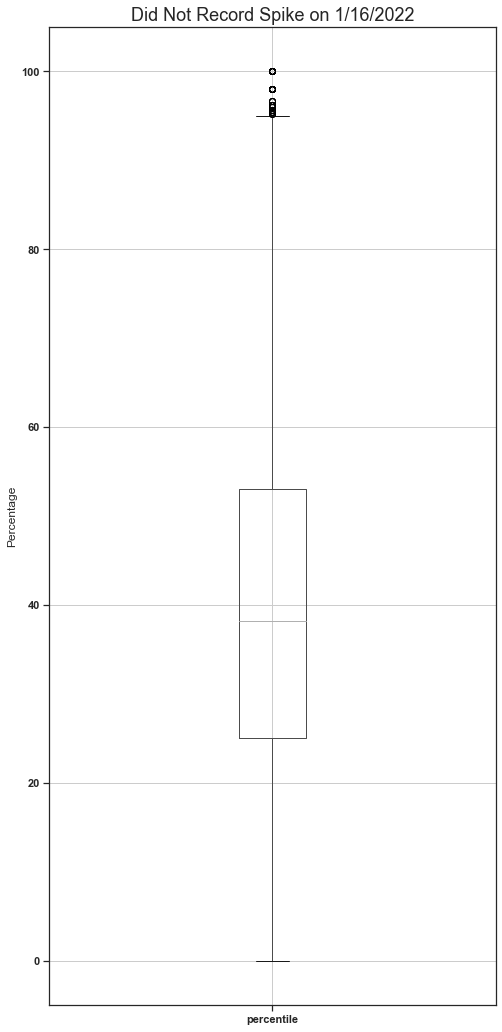

In [992]:
plt.figure(figsize = (8,18))
recent_test_did_not_record_spike.boxplot('percentile')

#fig = plt.figure()
#fig.suptitle('Recorded Spike')
font1 = {'size':18}
plt.title('Did Not Record Spike on 1/16/2022', fontdict=font1)
plt.ylabel('Percentage')
#plt.xlabel('test')

plt.show()

Sites that did and did not record the spike shared close values in their percentile means, however sites that did record the spike have a max value of 95.00 whereas sites that did not record the spike have a max value of 100.00. The difference in max percentile values between the two categories of sites indicate that the sites who did record the spike have found lower historical proportions of the Covid-19 virus in the wastewater in comparison to the sites that did not test during the spike, resulting in their higher historical values that reach the 100th percentile. 

### Question: What is the relationship of the percent change in Covid-19 wastewater levels for each 15 day period?

ptc_15d: The percent change in SARS-CoV-2 RNA levels over the 15-day interval defined by 'date_start' and 'date_end'

<Figure size 2520x1224 with 0 Axes>

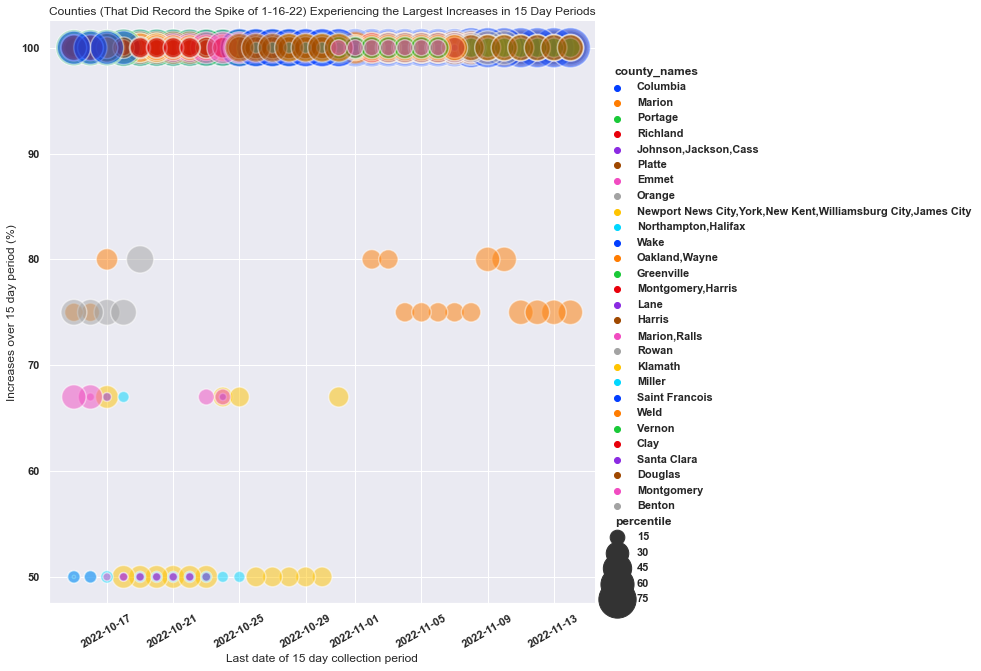

In [993]:

ptc_15_d_recent_did_record_spike = recent_test_recorded_spike.head(n=1000).sort_values(by = "ptc_15d",  ascending = True,inplace = False, na_position ='last' )
plt.figure(figsize = (35,17))
sns.set_style("darkgrid")
g= sns.relplot(x="date_end",
                    y= "detect_prop_15d",
                    hue="county_names",
                    size = "percentile",
                    sizes=(10, 1600), 
                    alpha=.5, 
                    palette="bright",
                    height=9,
                    data = ptc_15_d_recent_did_record_spike).set(
    title="Counties (That Did Record the Spike of 1-16-22) Experiencing the Largest Increases in 15 Day Periods")
g.set_xticklabels(rotation=30)

sns.set_style("ticks",{'axes.grid' : True})
g.set(xlabel='Last date of 15 day collection period'  ,ylabel='Increases over 15 day period (%)')


<Figure size 2520x1224 with 0 Axes>

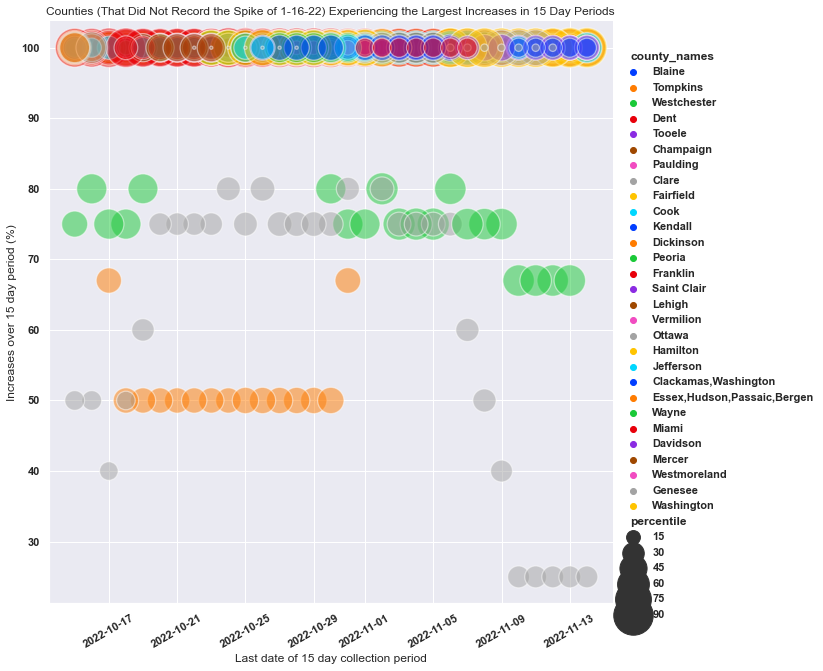

In [994]:
ptc_15_d_recent_didnt_record_spike = recent_test_did_not_record_spike.head(n=1000).sort_values(by = "ptc_15d",  ascending = True,inplace = False, na_position ='last' )
# most_populous_facility_recent.head(n=50)

plt.figure(figsize = (35,17))
sns.set_style("darkgrid")
gr = sns.relplot(x="date_end",
                    y= "detect_prop_15d",
                    hue="county_names",
                    size = "percentile",
                    sizes=(10, 1600), 
                    alpha=.5, 
                    palette="bright",
                    height=9,
                    data = ptc_15_d_recent_didnt_record_spike).set(
    title="Counties (That Did Not Record the Spike of 1-16-22) Experiencing the Largest Increases in 15 Day Periods")

gr.set_xticklabels(rotation=30)

sns.set_style("ticks",{'axes.grid' : True})
gr.set(xlabel='Last date of 15 day collection period'  ,ylabel='Increases over 15 day period (%)')





### Question: What are recent levels like in the most populous counties?
The most populous counties in the United States are Los Angeles (California), Cook (Illinois), Harris (Texas), Maricopa (Arizona), San Diego (California), Orange (California), Kings (New York), Miami-Dade (Florida), Dallas (Texas), and Riverside (California)
https://ballotpedia.org/Large_counties_in_the_United_States_by_population

In [995]:
pop_counties = ['Los Angeles', 'Cook', 'Harris', 'Maricopa', 'San Diego', 'Orange', 'Kings', 'Miami-Dade', 'Dallas', 'Riverside']

counties_recent_recorded_spike = recent_test_recorded_spike[recent_test_recorded_spike['county_names'].isin(pop_counties)]

counties_recent_did_not_record_spike = recent_test_did_not_record_spike[recent_test_did_not_record_spike['county_names'].isin(pop_counties)]


recent_populous_counties_recorded = counties_recent_recorded_spike.county_names.unique()
print("Most Populous US counties with testing facilities that recorded the spike: ",recent_populous_counties_recorded)
print()
recent_populous_counties_did_not_record = counties_recent_did_not_record_spike.county_names.unique()
print("Most populous US counties with testing facilities that didn't record the spike: ",recent_populous_counties_did_not_record )
print()
counties_in_both_lists = []
for elem in recent_populous_counties_recorded:
    if elem in recent_populous_counties_recorded and elem in recent_populous_counties_did_not_record:
        counties_in_both_lists.append(elem)
print('Counties that have facilities that recorded the spike as well as facilities that didnt: ', counties_in_both_lists)
print()
print('These counties: ',counties_in_both_lists,' will appear in both graphs, because they have some facilities that recorded the spike, and some that didn\'t.')

Most Populous US counties with testing facilities that recorded the spike:  ['Harris' 'Orange' 'Los Angeles' 'San Diego']

Most populous US counties with testing facilities that didn't record the spike:  ['Cook' 'Dallas' 'Orange' 'Maricopa' 'Los Angeles' 'Kings' 'Miami-Dade'
 'Riverside']

Counties that have facilities that recorded the spike as well as facilities that didnt:  ['Orange', 'Los Angeles']

These counties:  ['Orange', 'Los Angeles']  will appear in both graphs, because they have some facilities that recorded the spike, and some that didn't.


Text(0.5, 1.0, 'Recent Percentile Values for testing facilities in most Populous US Counties That Did Not Record 1/16/22 Spike')

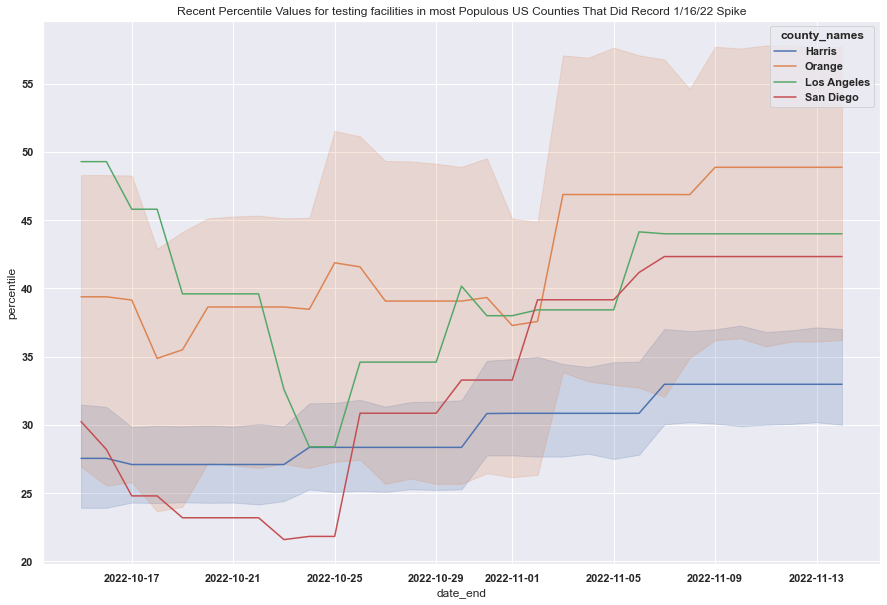

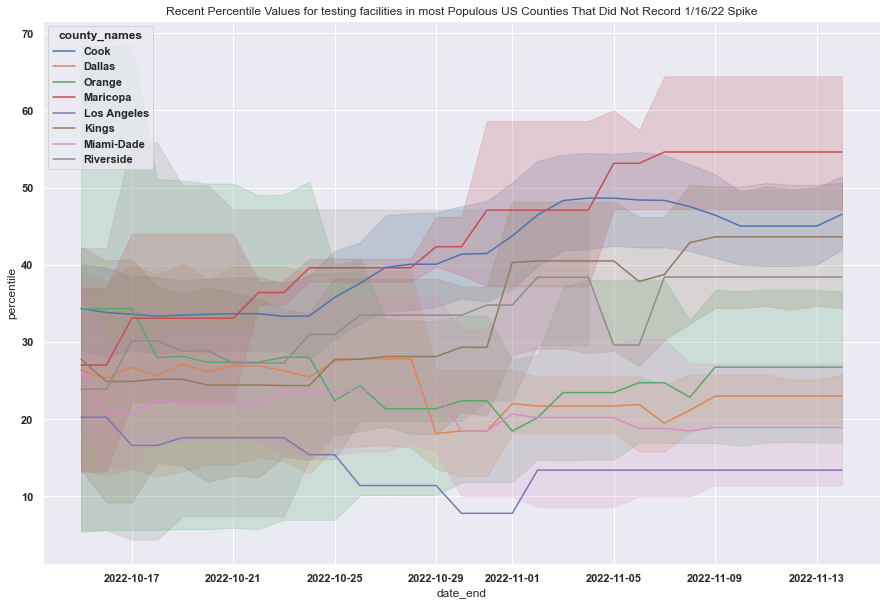

In [999]:

plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
sns.lineplot(data=counties_recent_recorded_spike, x='date_end', y='percentile', hue='county_names').set_title('Recent Percentile Values for testing facilities in most Populous US Counties That Did Record 1/16/22 Spike')
print()
plt.figure(figsize = (15,10))
sns.lineplot(data=counties_recent_did_not_record_spike, x='date_end', y='percentile', hue='county_names').set_title('Recent Percentile Values for testing facilities in most Populous US Counties That Did Not Record 1/16/22 Spike')



### Question: How many people do the facilities in the most populous counties serve?

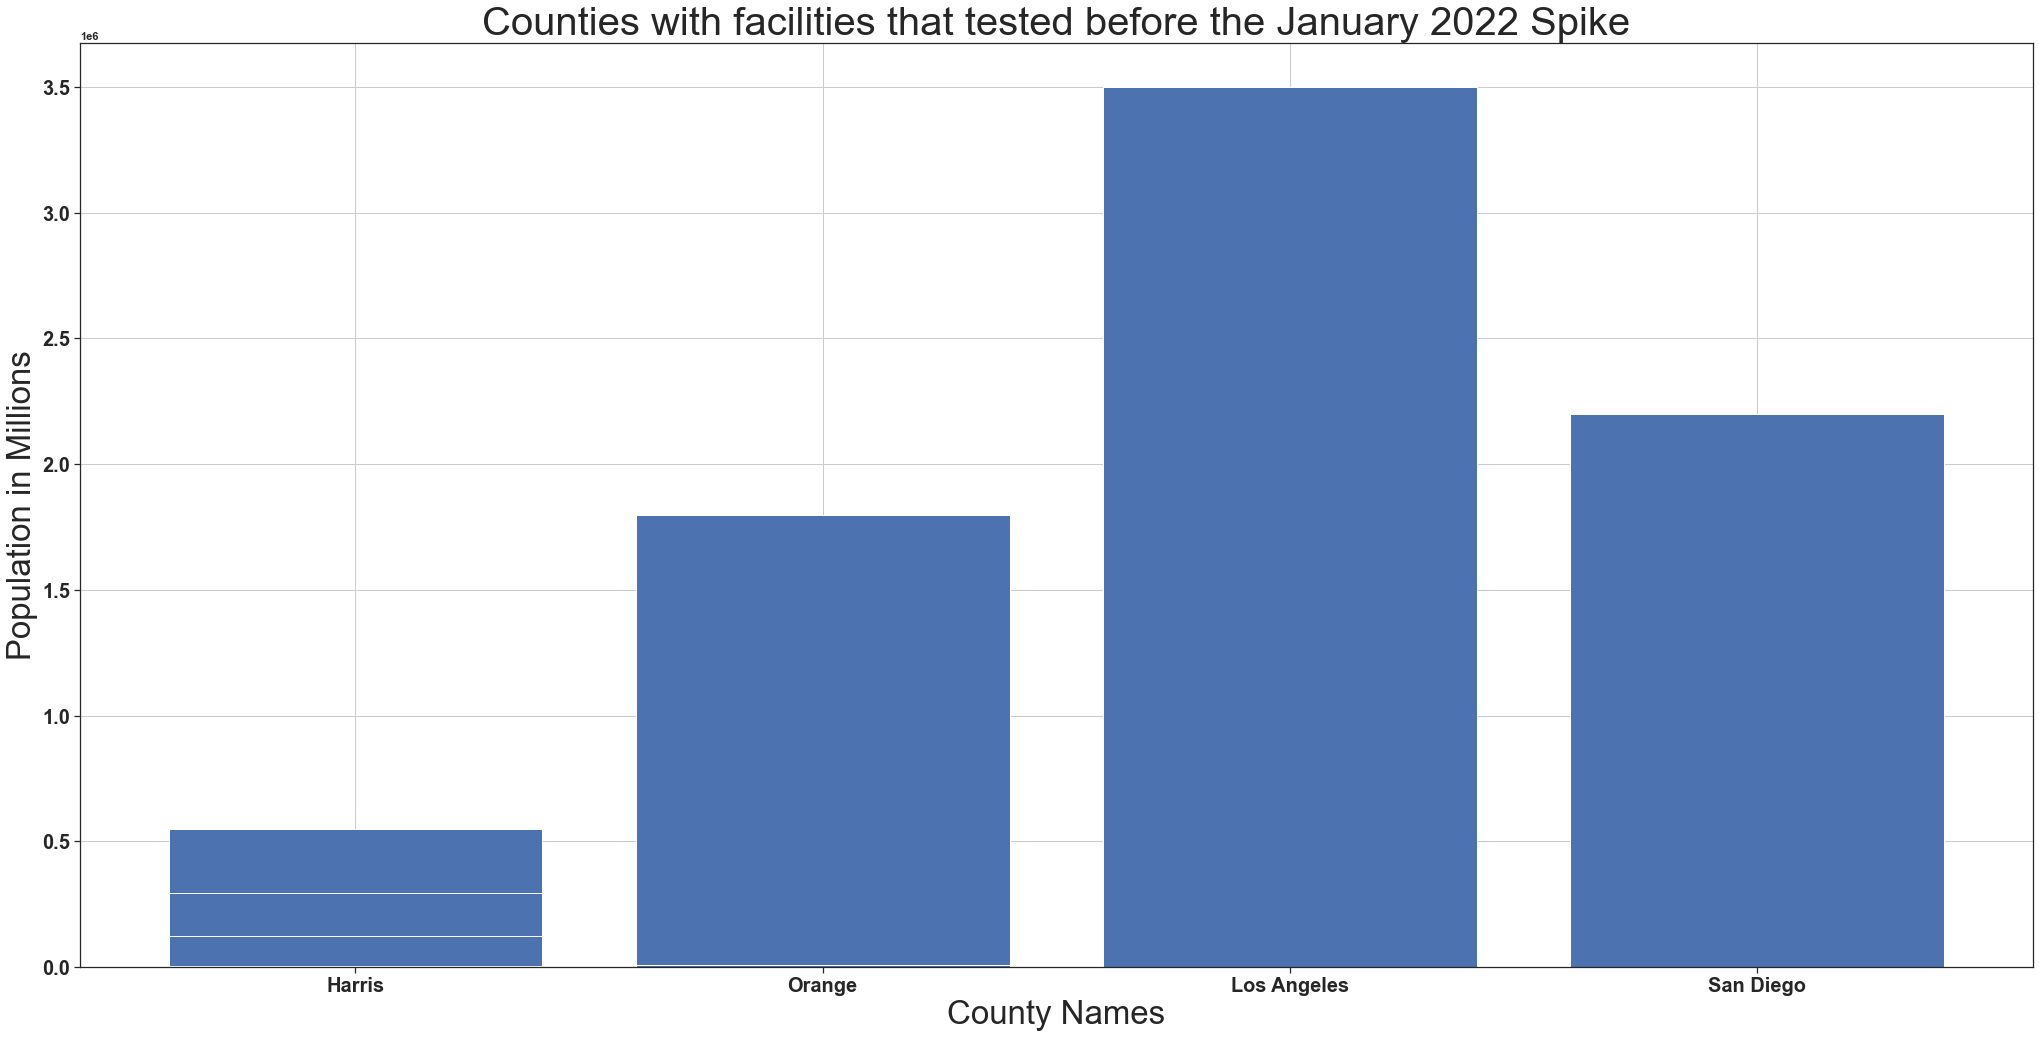

In [997]:
plt.figure(figsize = (35,17))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

font1 = {'size':33}
font2 = {'size':40}
plt.title('Counties with facilities that tested before the January 2022 Spike', fontdict=font2)
plt.xlabel("County Names", fontdict=font1)
plt.ylabel("Population in Millions", fontdict=font1)

plt.bar( counties_recent_recorded_spike.county_names,counties_recent_recorded_spike.population_served)

plt.show()

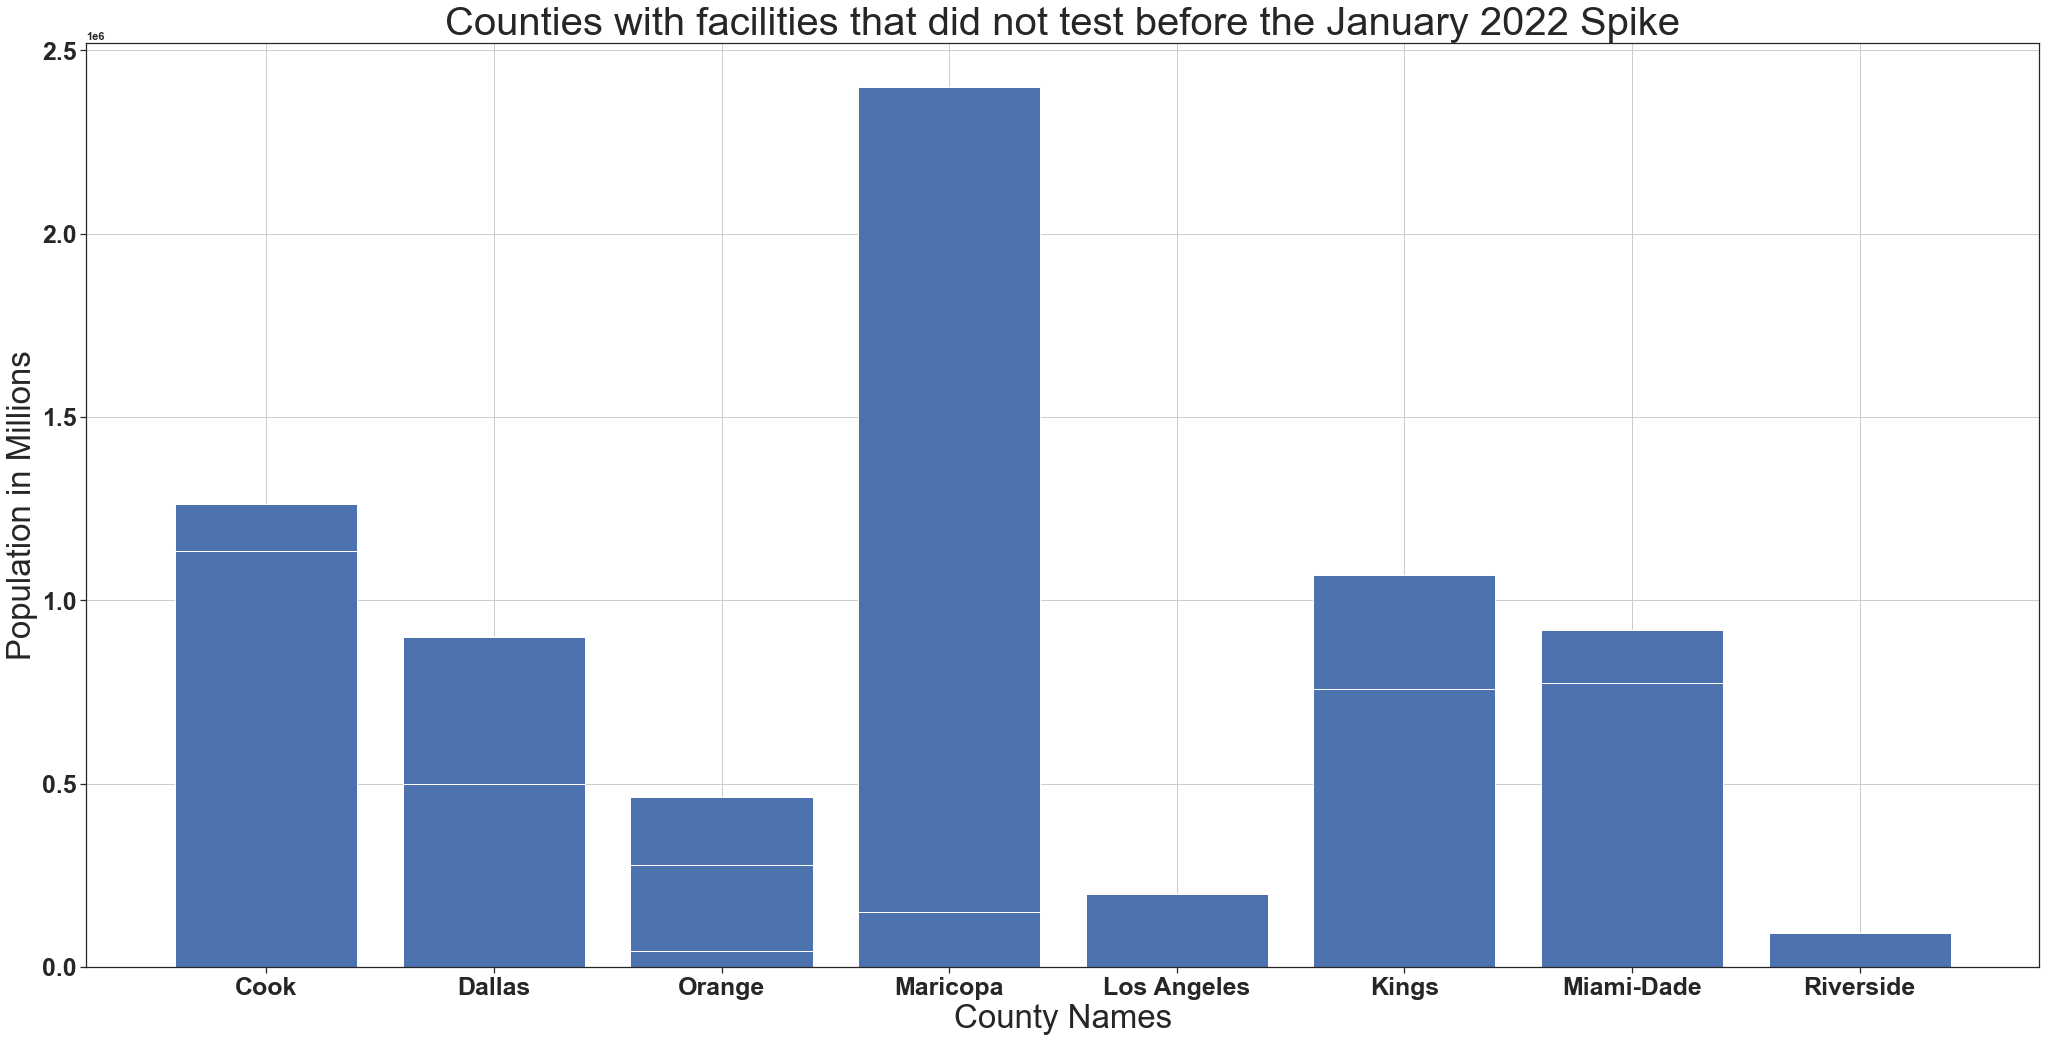

In [998]:
counties_recent_did_not_record_spike

plt.figure(figsize = (35,17))

plt.title('Counties with facilities that did not test before the January 2022 Spike', fontdict=font2)
plt.ylabel("Population in Millions", fontdict=font1)
plt.xlabel("County Names", fontdict=font1)
font2 = {'size':40}
font1 = {'size':33}

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.bar( counties_recent_did_not_record_spike.county_names,counties_recent_did_not_record_spike.population_served)
plt.show()

The bar plots above represent the size of populations served of the most populous counties participating in the wastewater testing. The counties participating are generally large and contain multiple wastewater treatment facilities that began testing at different times; some tested before the January 2022 spike and the others began their testing after. The scale of populations served is quite large, ranging from 100,000 to 2,500,000 in population dense counties. 

## Conclusion 

**Rough draft for conclusion (just ideas to get started)**

Public officials have created new procedures to test wastewater samples nationally to monitor current Covid-19 levels present. This approach allows public officials to predict and prepare for incoming case surges that otherwise may be overlooked with traditional case reporting measures. Wastewater collection site testing for SARS-CoV-2 throughout the US started at different times. We used January 16, 2022 as the “spike” date (New York Times, 2022) because reports have indicated that this date had the highest reported cases in the US. 

33.9% of facilities throughout the US started testing before the January 16, 2022 spike in reported Covid-19 cases and 66.1% started testing after. Therefore, the percentile of SARS-CoV-2 virus levels only show past historical levels at the same site and can not be used to compare with other sites. We then found that sites that tested before the spike date saw their median percentiles reach 95 and sites that did not record during the spike reach 100 during the month of October 2022. This indicates that the sites that tested during the spike date have recorded the the surge in causes hence the slightly lower median percentile value. 

**Expand on the relationship of percent change in covid-19 wastewater levels for each 15-day period.**

**Expand on what the recent levels are like in the most populous counties**

We wanted to see how large some sample sizes were in the most populous counties to better understand the scale of the wastewater testing study. The test sites with the highest populations that tested before the spike date consist of 500,000 to 3,500,000 people and the test sites that did not test before the spike range between 100,00 to 2,500,000 people. Some counties are large with multiple treatment plants that began testing at different times. 

**Reiterate limitations**